![header](../header.png)

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 5

Esse notebook tem por objetivo demonstrar o Casamento com Template ou *Template Matching*.

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas, a definição das funções úteis e a leitura das imagens.

In [1]:
import numpy as np
import cv2
from os import listdir, path
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
# Funcoes uteis 

# Funcao de leitura de imagens
def pdiguide_imgRead(path,convert=True,show=False):
    # Essa funcao cria uma lista de imagens dado o caminho (path) de um diretório.
    # Se "convert" é Verdadeiro, a função irá realizar a conversão das imagens de RGB para Grayscale
    # Se "show" é Verdadeiro, a função irá exibir as imagens carregadas
    
    img = [] # lista de imagens em tons de cinza

    number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos

    if(show):
        plt.figure(figsize=[20,10]) #define a existencia de uma figura e define o seu tamanho

    #A cada iteração uma imagem é carregada e convertida para tons de cinza, 
    #ao passo que é armazenada nos vetores acima
    for i in range(0,number_of_files): 
        img.append(cv2.imread(path + str(i+1) + '.png'))
        if(convert):
            img[i]=(cv2.cvtColor(img[i],cv2.COLOR_RGB2GRAY))

        #Exibe as imagens
        if(show):
            plt.subplot(1+number_of_files/5,5,i+1)
            plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
            #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.
            
    print("Leitura finalizada, total de imagens lidas = ",len(img))
    return img #retorna a lista de imagens
    
# Funcao apenas para exibicao da lista de imagens
def pdiguide_show(list_of_imgs):
    # Essa funcao exibe as imagens dado uma lista de imagens.
    number_of_files = len(list_of_imgs)
    plt.figure(figsize=[20,10]) 
    for i in range(0,number_of_files): 
        plt.subplot(1+number_of_files/5,5,i+1)
        plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
        
# Funcao para calcular e exibir o histograma de uma imagem 
def pdiguide_histogram(img,nbins,show=False):
    # Essa funcao calcula o histograma de um vetor 2D (imagem grayscale)
    # com valores inteiros entre 0-255.
    # Essa imagem retorna um vetor 1D com o histograma e os pontos 
    # que representam o bin_edges para plotagem do histograma.
    # Caso show seja verdadeiro ela mesmo irá plotar o histograma
    h, bin_edges = np.histogram(img.ravel(), nbins,(0,255))
    if show:
        w=256./nbins
        bin_centers = bin_edges[1:]-(w/2)
        plt.bar(bin_centers, h, width=w)
    
    return h, bin_edges

In [3]:
# Leitura das imagens
path = '../Data/'
img = pdiguide_imgRead(path)

Leitura finalizada, total de imagens lidas =  20


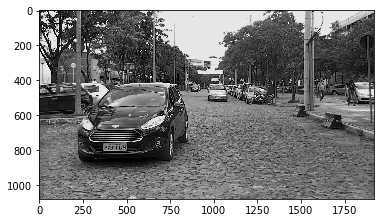

In [4]:
# Utilizando somente a imagem 0 
im = img[0]
plt.imshow(im,cmap='gray')

#### *Template Matching*

A técnica definida como *Template matching* é uma técnica usada para achar as
instâncias de uma máscara T dentro de uma imagem I. Basicamente, o método realiza
uma convolução da máscara sobre toda a imagem e retorna a posição onde existe a menor
diferença e o valor de tal diferença. É importante ressaltar que, se a máscara possuir
a mesma dimensão da imagem, o resultado da abordagem é semelhante ao cálculo da
diferença ponto a ponto entre as imagens.

Para estimar a diferença entre a máscara e a imagem de teste durante a convolução,
existem diversas métricas (MAHALAKSHMI; MUTHAIAH; SWAMINATHAN, 2012). A
técnica mais comum é a correlação e suas variações e a diferença quadrática média.

Para iniciar precisamos contruir o nosso template, para facilitar vamos recortar a placa da imagem definida acima. Depois demonstraremos o algoritmo de *Template Matching*

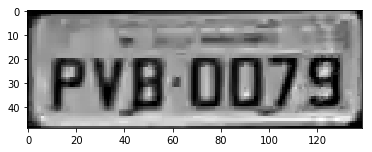

In [17]:
# Recortando a placa

plate = im[756:805,366:505] # esses valores foram obtidos observando a imagem acima
    
plt.imshow(plate,cmap='gray')

O algoritmo de *Template Matching* aqui implementado recebe o ponto com maior similaridade ou menor dissimilaridade ao template como sendo o ponto superior esquerdo da localização do template na imagem. Em seguida, desenha um retangulo de mesma dimensão que o template tomando como origem esse ponto.

Os métodos de similaridade ou dissimilaridade presentes na função do OpenCV *cv2.matchTemplate()* são:

- Correlação dos coeficientes (Similaridade):  cv2.TM_CCOEFF
- Correlação dos coeficientes Normalizada (Similaridade): cv2.TM_CCOEFF_NORMED
- Correlação Cruzada (Similaridade): cv2.TM_CCORR
- Correlação Cruzada Normalizada (Similaridade): cv2.TM_CCORR_NORMED
- Diferença Quadrática (Dissimilaridade): cv2.TM_SQDIFF
- Diferença Quadrática Normalizada (Dissimilaridade): cv2.TM_SQDIFF_NORMED

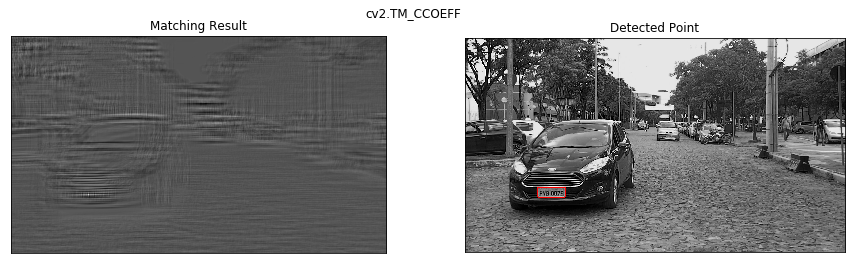

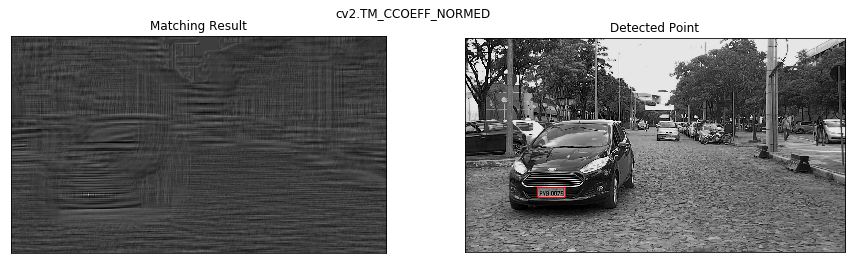

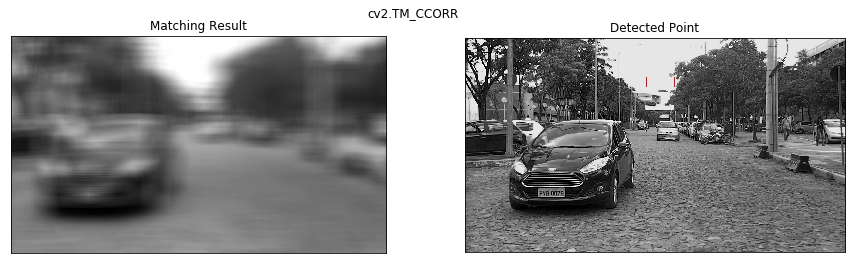

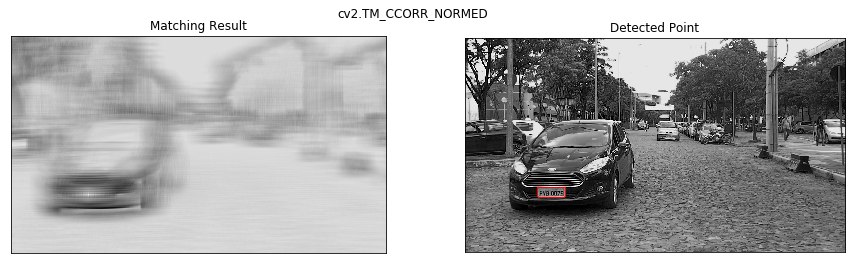

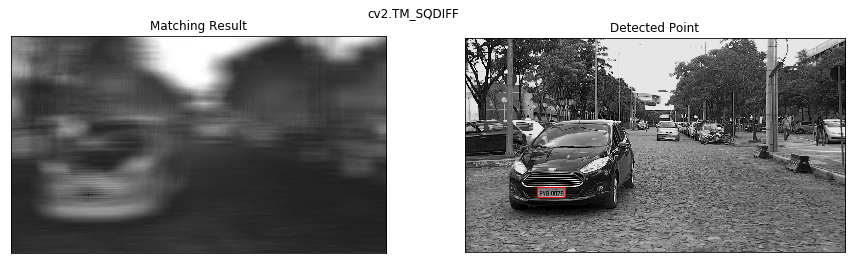

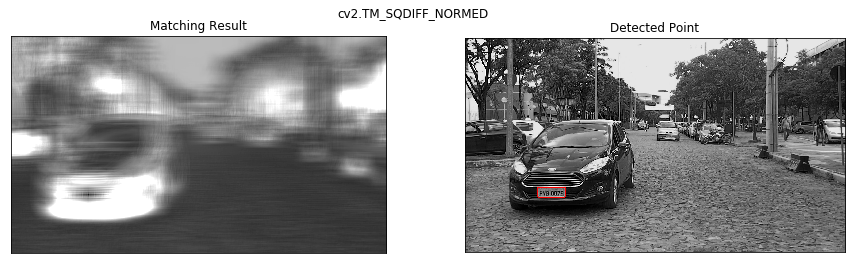

In [27]:
# Algoritmo de Template Matching

mpl.rcParams['figure.figsize'] = (15.0, 4.0) #alterar as dimensões default da figura do MatplotLib

# Definicao de uma lista com os metodos usados pelo Template Matching do OpenCV
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Armazena nas variaveis h e w as dimensoes do template
h = plate.shape[0]
w = plate.shape[1]

for meth in methods: #Para cada método presente na lista
    img2 = im.copy() # copia a imagem original para img2
    template = plate.copy() # copia a imagem da placa como template
    method = eval(meth) # associa as strings em métodos as suas contantes do OpenCV

    # Aplicando o template Matching
    res = cv2.matchTemplate(img2,plate,method)
    
    # Extraindo os pontos de máxima e mínimo globais
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Se o metodo for TM_SQDIFF ou TM_SQDIFF_NORMED, armazeno o valor mínimo
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Cria o retangulo tomando o ponto de máxima ou mínima como ponto superior esquerdo
    bottom_right = (top_left[0] + w, top_left[1] + h) #definicao do ponto inferior direito
    temp = cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB) #conversao de tons de cinza para RGB
    cv2.rectangle(temp,top_left, bottom_right, 255, 2) #funcao que desenha retangulos em uma imagem 

    # Plot da imagem resultado e da localizacao do template na imagem
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(temp,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

Observa-se que para o método da correlação cruzada (*TM_CCORR*) não obtivemos um bom resultado.

### Referências